<a href="https://colab.research.google.com/github/pavithraus/Task-2-EDA/blob/main/Visualization_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  FamilySize Title  
0      0         A/5 21171   7.2500        S           2    Mr  
1      0          PC 17599  71.2833        C           2   Mrs  
2      0  STON/O2. 3101282   7.9250        S           1  Miss  
3      0            113803  53.1000        S  

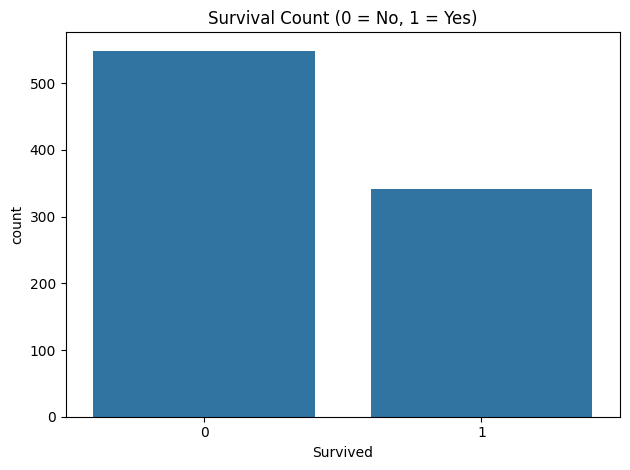

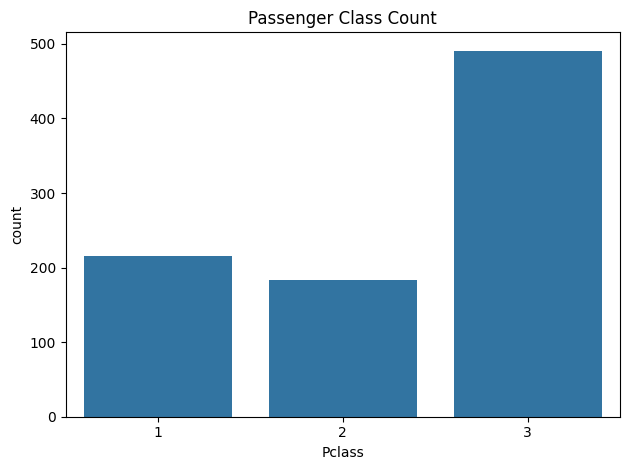

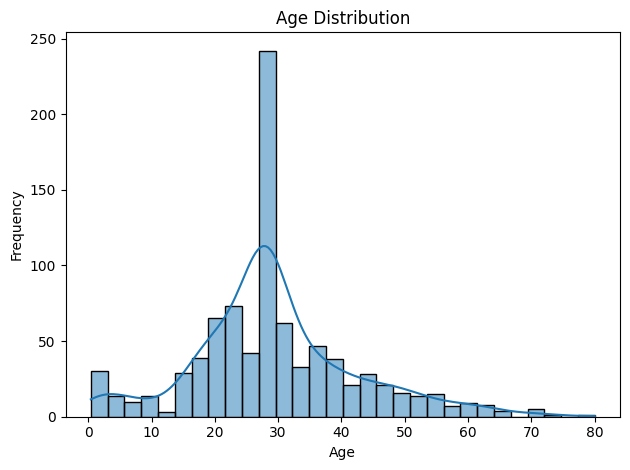

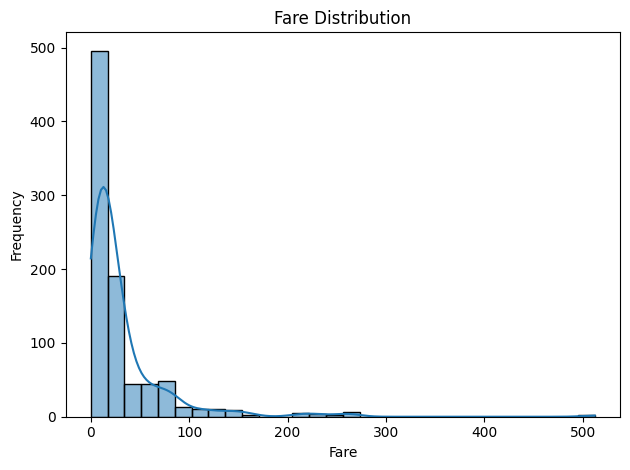

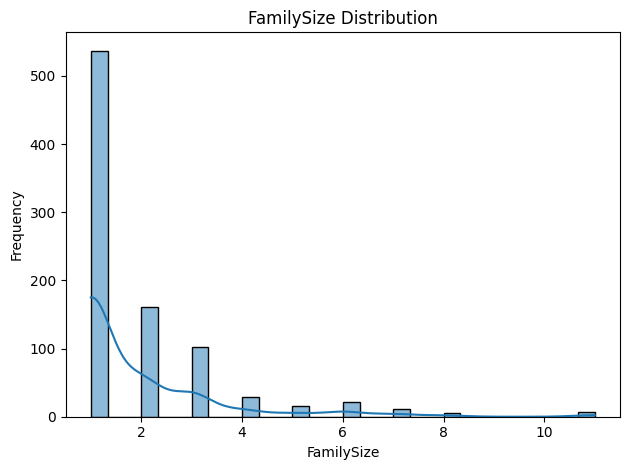

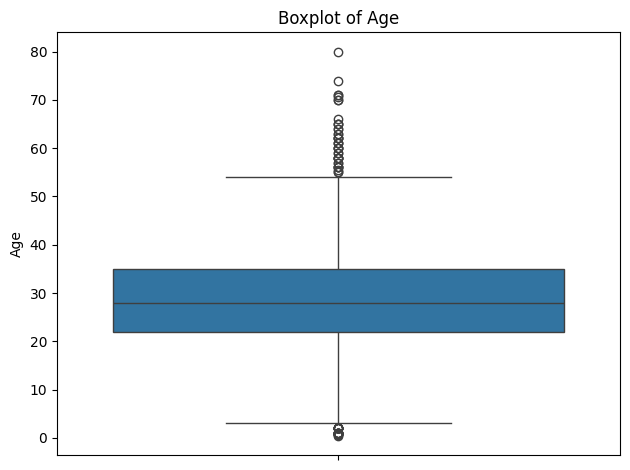

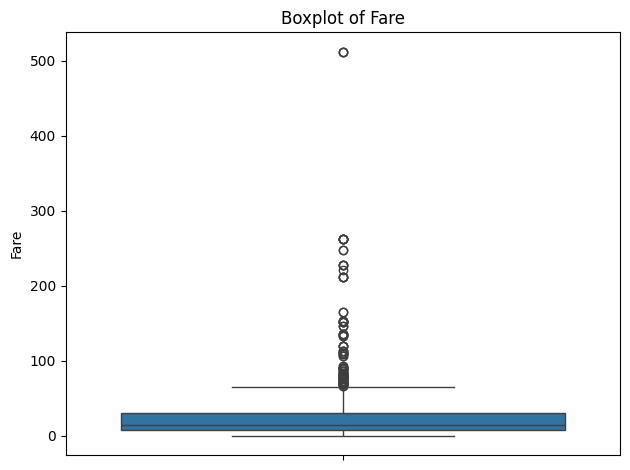

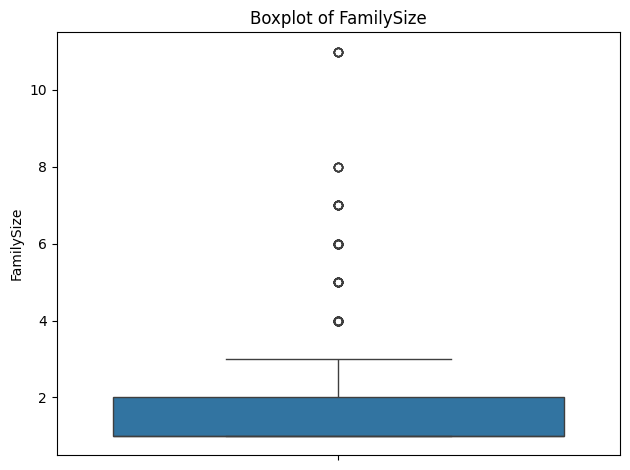

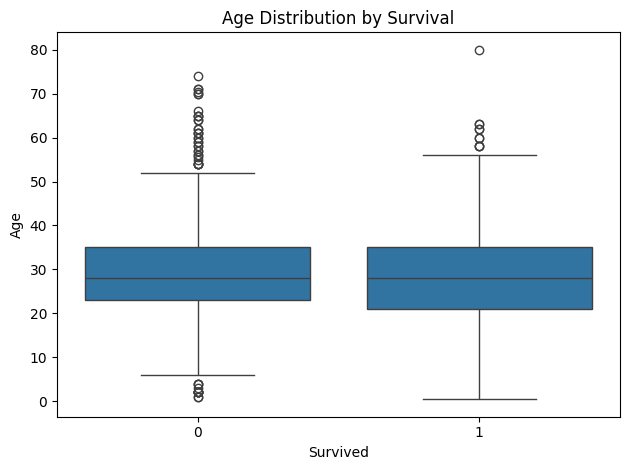

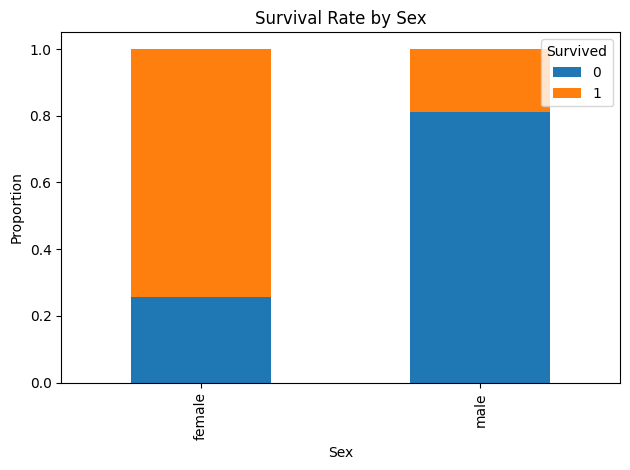

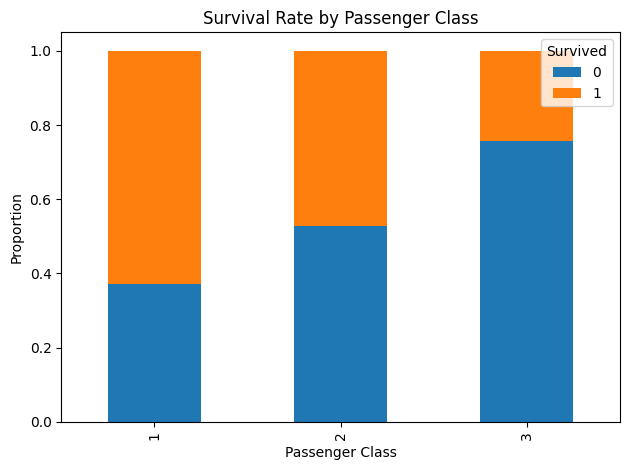

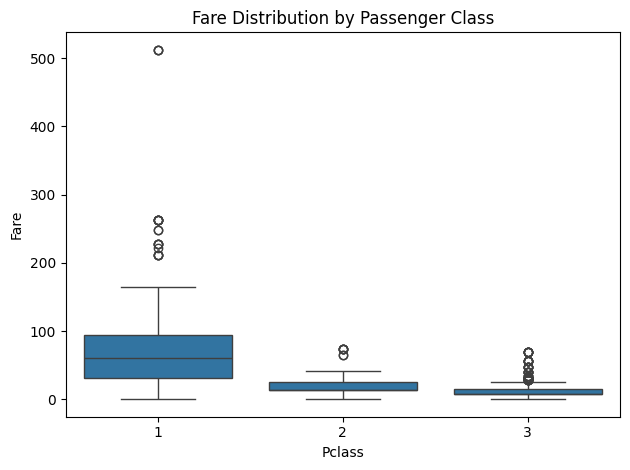

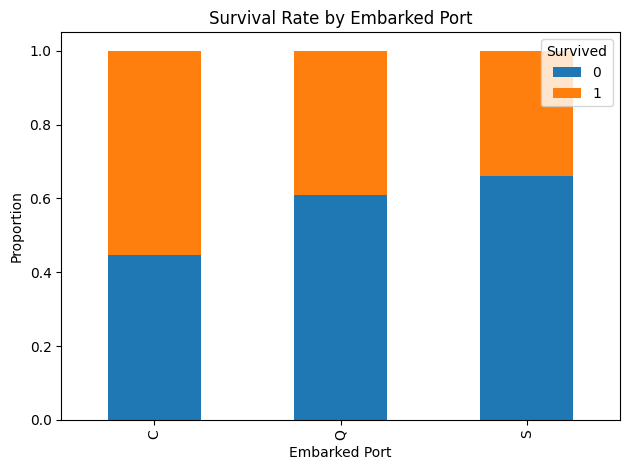

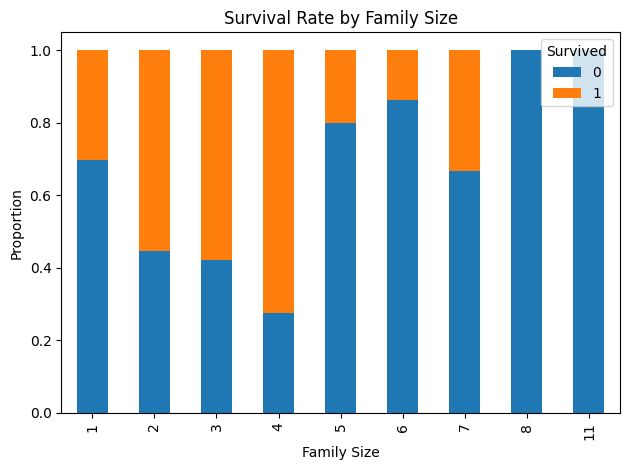

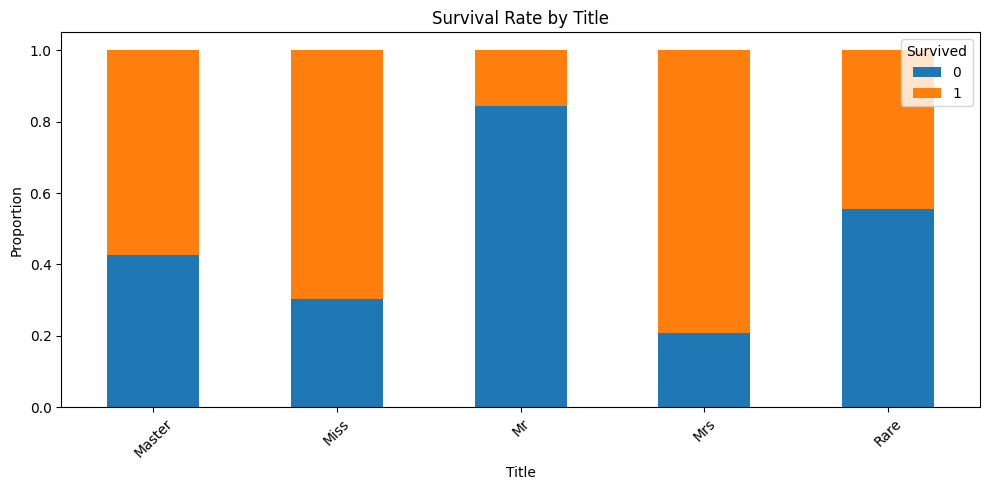

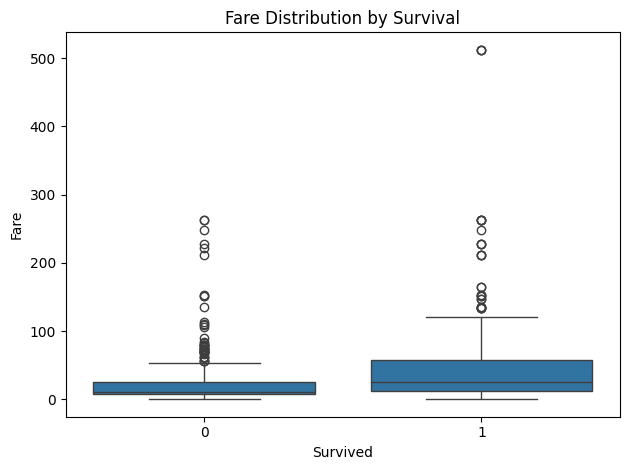

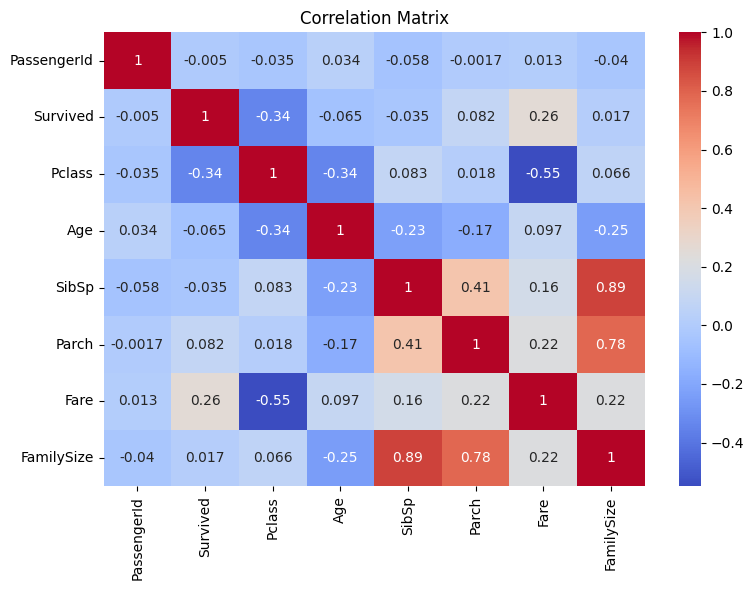

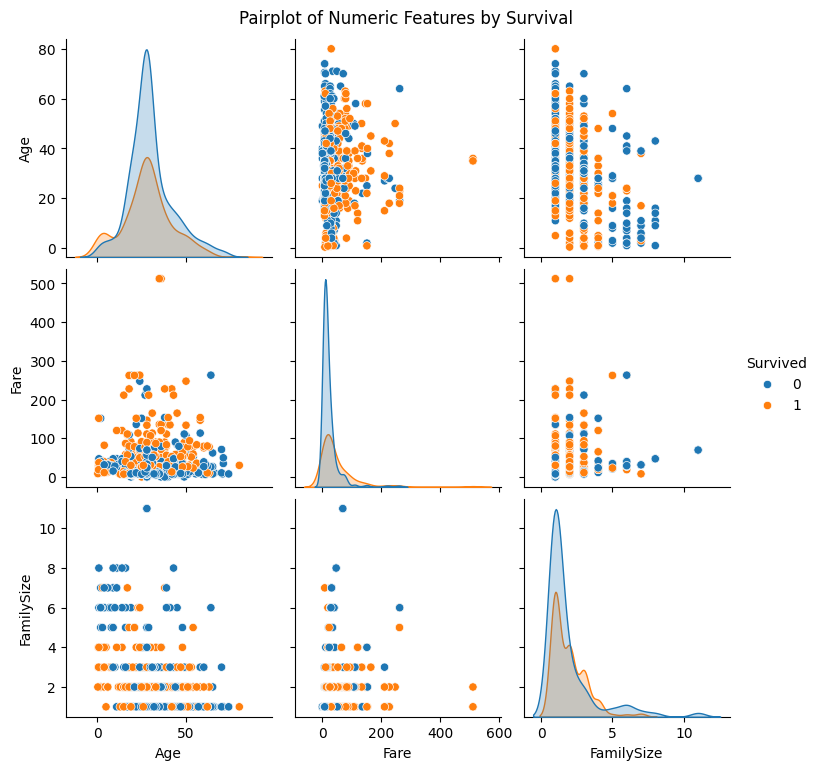


Skewness of numerical features:
Age           0.510245
Fare          4.787317
FamilySize    2.727441
dtype: float64

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   
FamilySize     -0.040143  0.016639  0.065997 -0.245619  0.890712  0.783111   

                 Fare  FamilySize  
PassengerId  0.012658   -0.040143  
Survived     0.257307    0.016639  
Pclass      -0.549500    0.065997  
Age          0.

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ------------------- Load and Clean Data -------------------

# Load dataset
data = pd.read_csv("/content/Titanic.csv")

# Handle missing values with .loc to avoid SettingWithCopyWarning
data.loc[:, 'Age'] = data['Age'].fillna(data['Age'].median())
data.loc[:, 'Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Optional: Extract Deck from Cabin (commented out due to many missing)
# data['Deck'] = data['Cabin'].str[0]
# data['Deck'].fillna('Unknown', inplace=True)

data.drop(columns=['Cabin'], inplace=True)

# ------------------- Feature Engineering -------------------

# Create FamilySize
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Extract Title from Name
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Map rare titles to 'Rare'
title_counts = data['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
data['Title'] = data['Title'].replace(rare_titles, 'Rare')

# ------------------- Data Overview -------------------

print("First 5 rows:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nMissing Values in Each Column:")
print(data.isnull().sum())

#--------------------Statistics summary----------------
print("\nSummary Statistics:")
print(data.describe())

# ------------------- Visualizations -------------------

# Survival count
sns.countplot(x='Survived', data=data)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()

# Passenger class count
sns.countplot(x='Pclass', data=data)
plt.title('Passenger Class Count')
plt.tight_layout()
plt.show()

# ------------------- Histograms for Numeric Features -------------------

numeric_features = ['Age', 'Fare', 'FamilySize']

for col in numeric_features:
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# ------------------- Boxplots for Numeric Features -------------------

for col in numeric_features:
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

#________.Identify patterns, trends, or anomalies in the data._________

# Age vs Survival
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival')
plt.tight_layout()
plt.show()

# Survival by Sex (with percentages)
sex_survival = data.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
sex_survival_pct = sex_survival.div(sex_survival.sum(axis=1), axis=0)

sex_survival_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right')
plt.tight_layout()
plt.show()

# Survival by Passenger Class (percentages)
pclass_survival = data.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
pclass_survival_pct = pclass_survival.div(pclass_survival.sum(axis=1), axis=0)

pclass_survival_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right')
plt.tight_layout()
plt.show()

# Fare distribution by Class
sns.boxplot(x='Pclass', y='Fare', data=data)
plt.title('Fare Distribution by Passenger Class')
plt.tight_layout()
plt.show()

# Survival by Embarked Port (percentages)
embarked_survival = data.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
embarked_survival_pct = embarked_survival.div(embarked_survival.sum(axis=1), axis=0)

embarked_survival_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right')
plt.tight_layout()
plt.show()

# Survival by Family Size (percentages)
family_survival = data.groupby(['FamilySize', 'Survived']).size().unstack(fill_value=0)
family_survival_pct = family_survival.div(family_survival.sum(axis=1), axis=0)

family_survival_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right')
plt.tight_layout()
plt.show()

# Survival by Title (percentages)
title_survival = data.groupby(['Title', 'Survived']).size().unstack(fill_value=0)
title_survival_pct = title_survival.div(title_survival.sum(axis=1), axis=0)

title_survival_pct.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Proportion')
plt.legend(title='Survived', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fare distribution by Survival
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title('Fare Distribution by Survival')
plt.tight_layout()
plt.show()

# ------------------- Feature Relationships -------------------

# Correlation heatmap (only numeric columns)
plt.figure(figsize=(8, 6))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Pairplot (limited columns)
sns.pairplot(data[['Age', 'Fare', 'FamilySize', 'Survived']], hue='Survived')
plt.suptitle('Pairplot of Numeric Features by Survival', y=1.02)
plt.show()

# ------------------- Stats -------------------

print("\nSkewness of numerical features:")
print(data[numeric_features].skew())

print("\nCorrelation Matrix:")
print(data.select_dtypes(include=[np.number]).corr())